#### Simple Linear Regression

**1. Download the ‘Auto Insurance in Sweden’ from this link, https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html . Plot a scatterplot with number of claims as x and total payment as y.  5 points**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# had to enter data this way due to edit disabled on excel for
# this data and notepad++ couldn't recognize the data
x = [[108], [19], [13], [124], [40], [57], [23], [14], [45], [10], [5], [48], [11], 
     [23], [7], [2], [24], [6], [3], [23], [6], [9], [9], [3], [29], [7], [4], [20], [7], 
     [4], [0], [25], [6], [5], [22], [11], [61], [12], [4], [16], [13], [60], [41], [37], 
     [55], [41], [11], [27], [8], [3], [17], [13], [13], [15], [8], [29], [30], [24], [9], 
     [31], [14], [53], [26]]
y = [[392.5], [46.2], [15.7], [422.2], [119.4], [170.9], [56.9], [77.5], 
     [214], [65.3], [20.9], [248.1], [23.5], [39.6], [48.8], [6.6], [134.9], 
     [50.9], [4.4], [113], [14.8], [48.7], [52.1], [13.2], [103.9], [77.5], 
     [11.8], [98.1], [27.9], [38.1], [0], [69.2], [14.6], [40.3], [161.5], [57.2], 
     [217.6], [58.1], [12.6], [59.6], [89.9], [202.4], [181.3], [152.8], [162.8], 
     [73.4], [21.3], [92.6], [76.1], [39.9], [142.1], [93], [31.9], [32.1], [55.6], 
     [133.3], [194.5], [137.9], [87.4], [209.8], [95.5], [244.6], [187.5]]

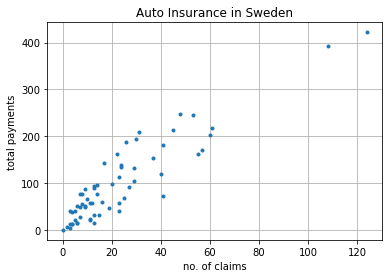

In [4]:
plt.title('Auto Insurance in Sweden')
plt.xlabel('no. of claims')
plt.ylabel('total payments')
plt.grid(True)
plt.plot(x, y, '.')

**2. Create a simple linear regression model for this data. Plotting the Linear Regression Line with the scatter plot.   10 points**

In [5]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

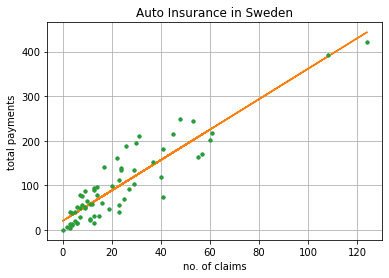

In [6]:
plt.plot(x, y, '.')
plt.plot(x, model.predict(x))

plt.title('Auto Insurance in Sweden')
plt.xlabel('no. of claims')
plt.ylabel('total payments')
plt.grid(True)
plt.plot(x, y, '.')

**3. What are the intercept and the slope of this Linear Regression Line? 5 points**

In [7]:
print("Intercept:")
print(model.intercept_)

print("Slope:")
print(model.coef_)

Intercept:
[19.99448576]
Slope:
[[3.41382356]]


**4. What is the R-squared value of this regression model? What does this R-squared value indicate?  5 points**

In [8]:
print("R-squared:")
print(model.score(x,y))

R-squared:
0.8333466719794502


**5. Use this model to predict the total payment of all claims when the number of claim is 65. 5 points**

In [9]:
print("Total Payment for 65 Claims:")
model.predict([[65]])

Total Payment for 65 Claims:


array([[241.89301716]])

**6. Create a new DataFrame by adding two instances, (x = 15, y = 250), (x = 40, y = 350). Create a second linear regression model with this new data. Plotting this new regression line as well as the first regression line on the scatter plot. How does the new regression line drift?   10 points**

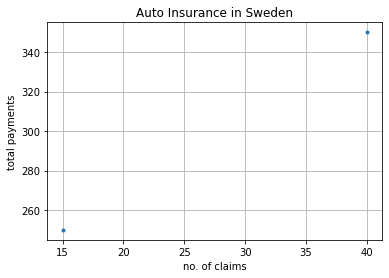

In [10]:
x_new = [[15], [40]]
y_new = [[250], [350]]
plt.title('Auto Insurance in Sweden')
plt.xlabel('no. of claims')
plt.ylabel('total payments')
plt.grid(True)
plt.plot(x_new, y_new, '.')

In [11]:
model_new = LinearRegression()
model_new.fit(x_new, y_new)

LinearRegression()

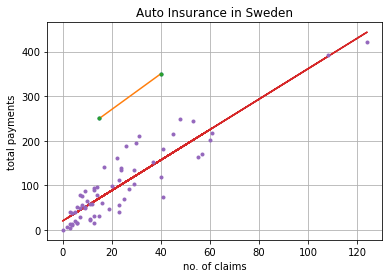

In [12]:
plt.plot(x_new, y_new, '.')
plt.plot(x_new, model_new.predict(x_new))

plt.title('Auto Insurance in Sweden')
plt.xlabel('no. of claims')
plt.ylabel('total payments')
plt.grid(True)
plt.plot(x_new, y_new, '.')

plt.plot(x, model.predict(x))
plt.plot(x, y, '.')

The newer regression line appears to be a more accurate prediction than the first one, though there are only two data points to reference for the prediction. The newer line is also a lot higher (location) than the first one, including higher payment amounts. 

**7. Using the examples in Question #6, find instances of outliers and instances of extreme values. How do they affect the regression model in a different way?  5 points   Distinction between Outliers and Extreme Values:  https://online.stat.psu.edu/stat462/node/170/.**

- *outlier*: "a data point whose response y does not follow the general trend of the rest of the data"
- *extreme*: "a data point has high leverage if it has "extreme" predictor x values. With a single predictor, **an extreme x value is simply one that is particularly high or low**. With multiple predictors, **extreme x values may be particularly high or low for one or more predictors**, or may be "unusual" combinations of predictor values (e.g., with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor)"

The new data from the second dataframe appear to be outliers, since they do not follow the normal trend as the rest of the insurance data from the first dataframe. The new data frame is does not contain extreme values.

The first dataframe does not contain outliers, but does have two extreme values, between 100 and 120 and the other past 120. 

**Outliers** affect the regression model by lowering the R-squared value, thus lowering the accuracy of the model's ability to predict. It also affects the intersect value, while the slope is not too heavily affected. 

**Extreme values** affect the regression model by decreasing both the slope and the intercept values, though the R-squared value is hardly affected. This shows that the extreme value does not directly affect the model's ability to predict, perhaps since extreme values still follow the general trend of the rest of the data. 

#### Multiple Linear Regression

**8. Download the dataset at https://drive.google.com/file/d/1RJSLQeWDYajULBsu7Xn3o7VIonT3Y9Lr/view?usp=sharing  . This data is from a fish market with the weight as the target variable and other variables as the explanatory variables. Upload to your Jupyter-notebook. Use a boxplot to examine the outliers in the column ‘Weight’. Remove the outliers outside the range of the boxplot. 10 points**

In [13]:
import pandas as pd
df = pd.read_csv('Fish.csv')
df.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


<AxesSubplot:>

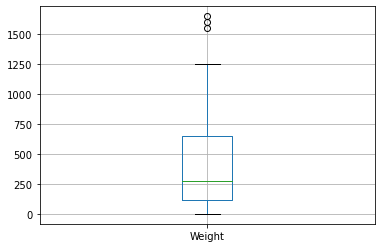

In [14]:
df.boxplot(column=['Weight'])

In [15]:
df.shape

(159, 6)

In [16]:
# max weight appears to be 1250; x > 1250 = outlier
df_clean = df[df['Weight']<1250]
df_clean.shape

(155, 6)

**9. Create a correlation matrix. Which are the two variables that the strongest correlation with the target variable ‘Weight’?  10 points**

In [17]:
print("Correlation Matrix")
print(df_clean.corr())

Correlation Matrix
           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.890173  0.894415  0.902576  0.815237  0.925664
Length1  0.890173  1.000000  0.999385  0.990205  0.688050  0.891260
Length2  0.894415  0.999385  1.000000  0.992765  0.704041  0.897855
Length3  0.902576  0.990205  0.992765  1.000000  0.768038  0.898315
Height   0.815237  0.688050  0.704041  0.768038  1.000000  0.803268
Width    0.925664  0.891260  0.897855  0.898315  0.803268  1.000000


In [18]:
co = df_clean.corr()
co.iloc[:,0].sort_values()

Height     0.815237
Length1    0.890173
Length2    0.894415
Length3    0.902576
Width      0.925664
Weight     1.000000
Name: Weight, dtype: float64

**Strongest correlation to weight:** 
1. Width
2. Length3

**10. Split the data into training (80%) and testing (20%) datasets. 5 points**

In [20]:
import numpy as np
x = pd.DataFrame(np.c_[df_clean['Width'], df_clean['Length3']], columns=['Width', 'Length3'])
y = df_clean['Weight']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x_train.head(5)

,Width,Length3
71,4.2340,29.0
69,3.6636,25.8
57,4.6816,30.8
81,2.7720,21.0
10,5.1042,36.2


**11. Build a linear regression model with all the variables using the training data. Calculate the R-squared value with the testing data. 10 points**

In [21]:
model_train = LinearRegression()
model_train.fit(x_train, y_train)

LinearRegression()

In [22]:
print("R-squared, test data:")
model_train.fit(x_test, y_test)
score_test = model_train.score(x_test, y_test)
print('%.4f' % score_test)

R-squared, test data:
0.9043


**12. Continue to use the training data. Build a second regression model with on the two independent variables with the highest correlation coefficients with the target variable. What is the R-squared value of this new model? Get the intercept and slopes. Create a formula y = c+ax1+bx2 for this new model. 10 points**

In [29]:
model_variables = LinearRegression()
model_variables.fit(x_train, y_train)

LinearRegression()

In [31]:
print("R-squared, new model:")
score_variable = model_variables.score(x_train, y_train)
print('%.4f' % score_variable)

R-squared, new model:
0.8766


In [32]:
print("Slope:")
print(model_variables.coef_)

print("Intercept:")
print(model_variables.intercept_)

Slope:
[107.26910706  11.58316997]
Intercept:
-453.7134129313455


In [33]:
print("Formula:")
print("y = 107.26910706x + (-453.7134129313455)")
print("y = 11.58316997x + (--453.7134129313455)")

Formula:
y = 107.26910706x + (-453.7134129313455)
y = 11.58316997x + (--453.7134129313455)


**13. Can we use a linear regression model for data with categorical variables? If yes, use this dataset with a new variable ‘species’ , https://drive.google.com/file/d/1orAdlGxALpyfT-RD1ogdhpmb86L54JeV/view?usp=sharing  . Transform the data into all numeric features.  Instruction: https://michael-fuchs-python.netlify.app/2019/06/14/the-use-of-dummy-variables/. 
Reuse the code above to build a new model with all variables including these dummy variables. Do you think the variable ‘species’ affect the weight?   20 points**

We can create a linear regression with categorical variables, as long as it is transformed into a numerical equivalent (for instance, boolean values can be 0 for False and 1 for True). 

In [24]:
df2 = pd.read_csv('Fish2.csv')
df2.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
species = ['object']
species_cols = list(df2.select_dtypes(include=species).columns)
species_data = df2[species_cols]
species_vars = species_data.columns

In [26]:
for var in species_vars:
    species_list = pd.get_dummies(df2[var], prefix=var)
    df2=df2.join(species_list)

In [27]:
data_vars = df2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in species_vars]

In [35]:
df2_final = df2[to_keep]
df2_final.columns.values
df2_final.head(5)

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [40]:
x = pd.DataFrame(np.c_[df2_final['Species_Bream'], df2_final['Species_Parkki'], df2_final['Species_Perch'], df2_final['Species_Pike'], df2_final['Species_Roach'], df2_final['Species_Smelt'], df2_final['Species_Whitefish'], 
                df2_final['Length1'], df2_final['Length2'], df2_final['Length3'], df2_final['Height'], df2_final['Width']], 
                 columns=['Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish', 'Length1', 'Length2', 'Length3', 'Height', 'Width'])
y = df2_final['Weight']

model_fish = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x_train.head(5)
model_fish.fit(x_train, y_train)

LinearRegression()

In [42]:
co_fish = df2_final.corr()
co_fish.iloc[:,0].sort_values()

Species_Smelt       -0.337109
Species_Roach       -0.261784
Species_Parkki      -0.186034
Species_Perch       -0.033240
Species_Whitefish    0.073625
Species_Pike         0.310641
Species_Bream        0.326795
Height               0.724345
Width                0.886507
Length1              0.915712
Length2              0.918618
Length3              0.923044
Weight               1.000000
Name: Weight, dtype: float64

Based on the correlation data above, I believe that the species does have an affect on weight, as the different species has a higher correlation value than the other features for the fish. 